In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter


import graphviz
from sklearn.tree import export_graphviz
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
pip install mlxtend
conda install python-graphviz
pip install scikit-plot

SyntaxError: invalid syntax (<ipython-input-3-55803a5f52e1>, line 1)

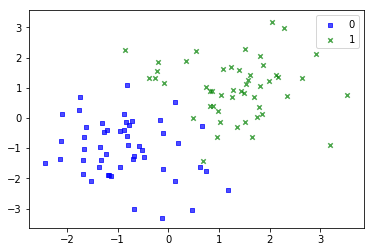

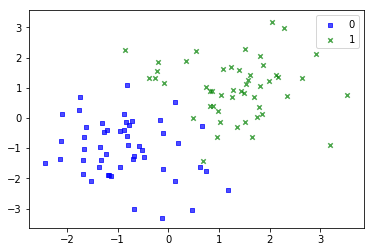

In [4]:
X, y = make_blobs(centers=[[-1, -1],[1, 1]], random_state=1)

df = pd.DataFrame(X, columns=['x1', 'x2']).assign(y=y)

category_scatter(x='x1', y='x2', label_col='y', data=df)


In [5]:
df.head()

,x1,x2,y
0,-1.528172,-2.072969,0
1,0.889553,0.382638,1
2,1.520576,-0.144341,1
3,0.819080,0.396079,1
4,3.190700,-0.896361,1


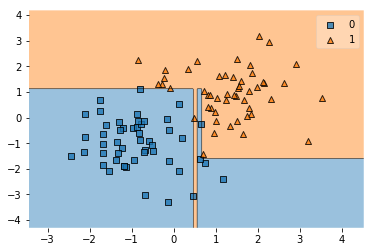

In [6]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X, y)

plot_decision_regions(X, y, clf=d_tree);

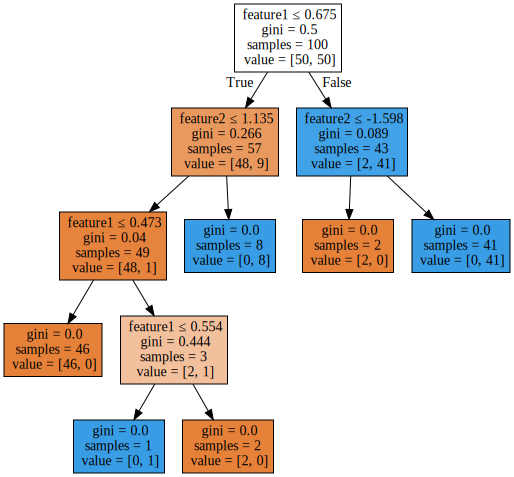

In [7]:
dot_data = export_graphviz(d_tree, out_file=None, feature_names=['feature1', 'feature2'],  
                                filled=True, special_characters=True)  

graphviz.Source(dot_data)

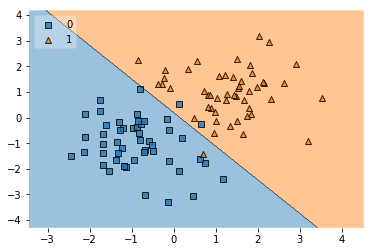

In [8]:
lr = LogisticRegression(random_state=1)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr, legend=2);

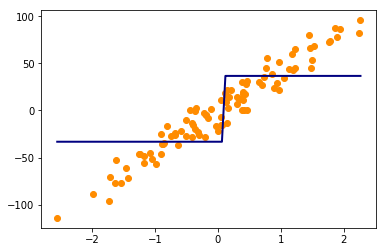

In [9]:
X, y = make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

r_tree = DecisionTreeRegressor(max_depth=1)
y_pred = r_tree.fit(X, y).predict(np.sort(X, axis=0))

plt.scatter(X, y, color='darkorange')
plt.plot(np.sort(X, axis=0), y_pred, color='navy', lw=2)

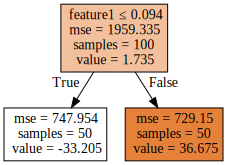

In [10]:
dot_data = export_graphviz(r_tree, out_file=None, feature_names=['feature1'],  
                                filled=True, special_characters=True)  

graphviz.Source(dot_data)

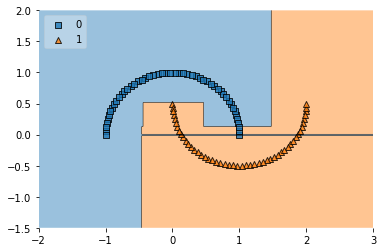

In [11]:
X, y = make_moons(n_samples=100, random_state=123)

d_tree = DecisionTreeClassifier(max_depth=5)
d_tree.fit(X, y)

plot_decision_regions(X, y, clf=d_tree, legend=2);

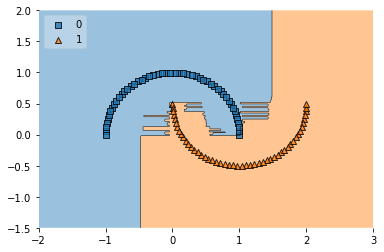

In [12]:
rf = RandomForestClassifier(n_estimators=100,  random_state=1)
rf.fit(X, y)

plot_decision_regions(X, y, clf=rf, legend=2);

In [13]:
rf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1791095845, splitter='best')

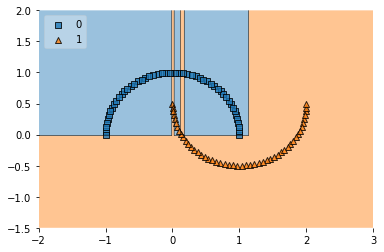

In [14]:
one_tree = rf.estimators_[4]

plot_decision_regions(X, y, clf=one_tree, legend=2);

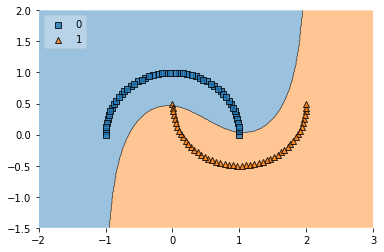

In [15]:
svm = SVC()
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm, legend=2);

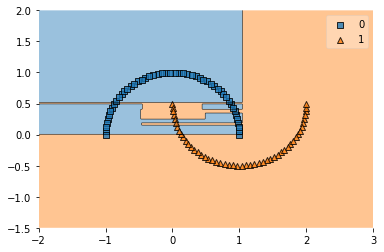

In [16]:
rf1 = rf.estimators_[3]
plot_decision_regions(X, y, clf=rf1);

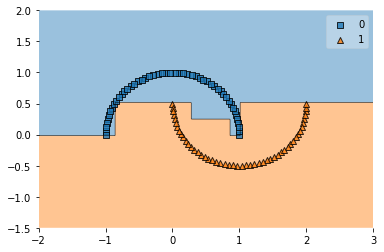

In [17]:
ab = AdaBoostClassifier()
ab.fit(X, y)

ab_est = ab.estimators_[3]

plot_decision_regions(X, y, clf=ab);

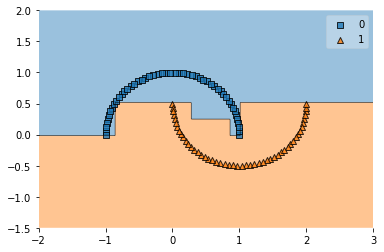

In [18]:
ab2 = AdaBoostClassifier()
ab2.fit(X, y)

ab_est2 = ab2.estimators_[1]

plot_decision_regions(X, y, clf=ab2);

In [39]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [38]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
dataset = load_breast_cancer()

X = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

df = pd.DataFrame(X, columns=feature_names).assign(target=y)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9521276595744681

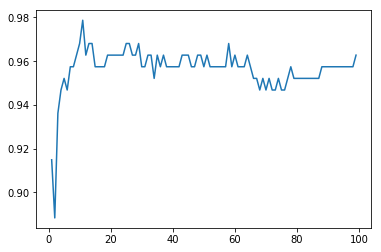

In [23]:
num_trees = range(1, 100)
scores = []
for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.plot(num_trees, scores)

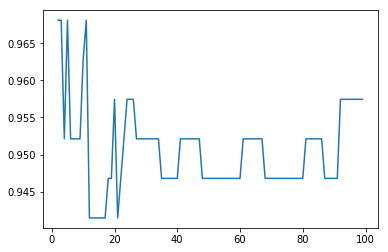

In [24]:
num_samples = range(2, 100)
scores = []
for n in num_samples:
    rf = RandomForestClassifier(min_samples_split=n, random_state=1)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.plot(num_samples, scores)

In [25]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.9574468085106383

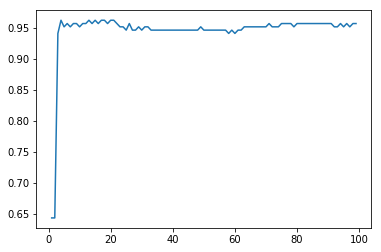

In [26]:
num_trees = range(1, 100)
scores = []
for n in num_trees:
    gb = GradientBoostingClassifier(n_estimators=n)
    gb.fit(X_train, y_train)
    scores.append(gb.score(X_test, y_test))
plt.plot(num_trees, scores)

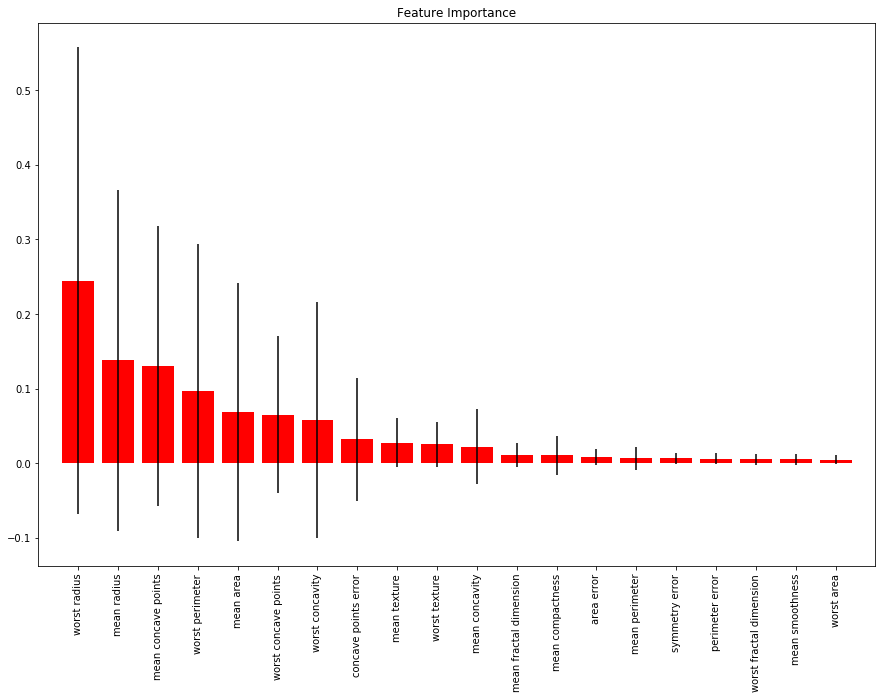

In [27]:
# how to get feature importances
rf = RandomForestClassifier()
rf.fit(X, y)
skplt.estimators.plot_feature_importances(rf, feature_names=feature_names, figsize=(15, 10),
                                         x_tick_rotation=90)

In [28]:
scaler = StandardScaler().fit(X_train)

rf = RandomForestClassifier()
rf.fit(scaler.transform(X_train), y_train)
rf.score(scaler.transform(X_test), y_test)

0.9414893617021277

In [29]:
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X_train):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    print(rf.score(X_test, y_test))

0.935064935064935
0.8947368421052632
0.9605263157894737
0.9605263157894737
0.9605263157894737


In [30]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier()
    rf.fit(scaler.transform(X_train), y_train)
    
    scaler = StandardScaler().fit(X_train)
    print(rf.score(scaler.transform(X_test), y_test))

0.9508196721311475
0.9016393442622951
0.819672131147541
0.9344262295081968
0.9508196721311475


In [31]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9836065573770492

In [32]:
scores = cross_val_score(pipeline, X_train, y_train)
np.mean(scores)

0.9303422663856268

In [33]:
parameters = {
    'n_estimators': [10, 100, 300],
    'min_samples_split': [2, 5, 10, 15]
}
rf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 300], 'min_samples_split': [2, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
# clf.best_params_
clf.best_score_

0.9467213114754098

In [35]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])
parameters = {
    'rf__n_estimators': [10, 100, 300],
    'rf__min_samples_split':[2, 5, 10, 15]
}
clf = GridSearchCV(pipeline, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease...timators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'rf__n_estimators': [10, 100, 300], 'rf__min_samples_split': [2, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
best_model = clf.best_estimator_

In [37]:
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.9344262295081968